In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product

## Get  Dataset

In [ ]:
def get_regression(X, y, regressors,texts):
  

  f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(10, 8))

  for idx, clf, tt in zip(product([0, 1], [0, 1]),
                          regressors,
                          texts):
      y_pred = clf.predict(np.sort(X_test.reshape(-1)).reshape(-1,1))

      axarr[idx[0], idx[1]].plot(np.sort(X_test.reshape(-1)).reshape(-1,1), y_pred)
      axarr[idx[0], idx[1]].scatter(X, y, c=y,
                                    s=20, edgecolor='k')
      axarr[idx[0], idx[1]].set_title(tt)

  plt.show()

In [ ]:
def report_regression( X, y,regressors,texts):
  from sklearn.metrics import mean_squared_error as mse
  results = {}
  for clf, tt in zip(     regressors,
                          texts):
      y_pred = clf.predict(X)
      results[tt] = mse(y, y_pred)


  return results

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/FeatureSelection/train_house.csv')

In [ ]:
data.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
y = data.SalePrice
X = data.drop(columns=['SalePrice'])


In [ ]:
X.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [ ]:
X['SaleCondition'].dtype

dtype('O')

In [ ]:
objs = []
nums = []
for i in X.columns:
  if X[i].dtype == 'O':
    objs.append(i)
  else:
    nums.append(i)

In [ ]:
na_objs = []
na_nums = []
for i in X.columns:
  if (X[i].isnull().sum() > 0):
    print(i, " ", X[i].isnull().sum())
    if X[i].dtype == 'O':
      na_objs.append(i)
    else:
      na_nums.append(i)

LotFrontage   259
Alley   1369
MasVnrType   8
MasVnrArea   8
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical   1
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageQual   81
GarageCond   81
PoolQC   1453
Fence   1179
MiscFeature   1406


In [ ]:
na_nums

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
na_objs

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
def impute(df, columns, dft):
    df_temp = df.copy()
    for column in columns:
      df_temp[column] = df_temp[column].apply(lambda x: np.random.choice(dft[column].dropna().values) if pd.isnull(x) else x)
    return df_temp

In [ ]:
X = impute(X,na_nums + na_objs , X)

In [ ]:
X.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Ex,MnPrv,Othr,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Ex,GdWo,Shed,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Ex,GdPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [ ]:
for col in objs:
  mapper = {k:i for i, k in enumerate(X[col].unique(), 0)} 
  X[col] = X[col].map(mapper)

X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,1,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,1,1,0,5,2007,0,0
2,3,60,0,68.0,11250,0,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,0,1,0,9,2008,0,0
3,4,70,0,60.0,9550,0,0,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216,0,0,540,756,0,1,0,0,961,756,0,1717,1,0,1,0,3,1,0,7,0,1,0,1,1998.0,1,3,642,0,0,0,0,35,272,0,0,0,0,2,1,0,2,2006,0,1
4,5,60,0,84.0,14260,0,1,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655,0,0,490,1145,0,0,0,0,1145,1053,0,2198,1,0,2,1,4,1,0,9,0,1,1,0,2000.0,0,3,836,0,0,0,192,84,0,0,0,0,1,0,1,0,12,2008,0,0


In [ ]:
objs_oh = []
for col in objs:
  if len(X[col].unique())>2:
    objs_oh.append(col)

objs_oh

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
len(X.columns)

80

In [ ]:
for i in objs_oh:
  X = pd.concat([X, pd.get_dummies(X[i], prefix = i, drop_first=True)], axis=1)

In [ ]:
X = X.drop(columns=objs_oh)

In [ ]:
len(X.columns)

246

In [ ]:
# from sklearn.decomposition import PCA
# obj = PCA()
# X   = obj.fit_transform(X)

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
regressors = [
    DecisionTreeRegressor().fit(X_train, y_train),
    KNeighborsRegressor().fit(X_train, y_train),
    SVR(gamma=.1, kernel='rbf').fit(X_train, y_train),
    RandomForestRegressor().fit(X_train, y_train)
    ]
texts = [    "DecisionTreeRegressor",
              "KNeighborsRegressor",
              "SVR",
              "RandomForestRegressor"]

In [ ]:
# get_regression(X_test, y_test, regressors, texts)

In [ ]:
report = report_regression( X_test, y_test,regressors,texts)
report

{'DecisionTreeRegressor': 1380553063.2420092,
 'KNeighborsRegressor': 1524284542.5496805,
 'RandomForestRegressor': 880993428.9018482,
 'SVR': 5451044562.191096}

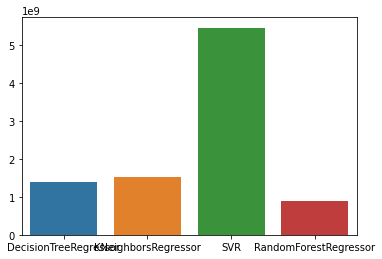

In [ ]:
keys = list(report.keys())
vals = [float(report[k]) for k in keys]
sns.barplot(x=keys, y=vals)